Importação das funções auxiliares e bibliotecas de aprendizade de máquina

In [1]:
from copy import deepcopy
from itertools import count
import random
from matplotlib.pyplot import axis
from sklearn.utils import shuffle
from math import ceil
import pandas as pd

def printa(a):
    print(a)
    return

def normalizaMinMax(coluna):
    minimo = coluna.min()
    maximo = coluna.max()
    return (coluna-minimo)/(maximo-minimo)

def split_in_folds(data, k):
    max_fold_size = ceil(data["id"].count()/k)
    folds = []
    for fold_index in range(k):
        folds.append([])
        for item_index in range(max_fold_size):
            item = data.sample()
            data.drop(item.index, inplace=True)
            folds[fold_index].append(item)
            if data.empty:
                break
    return folds

def merge_folds(folds):
    result = []
    for fold in folds:
        result += fold
    return result

def fold_to_df(fold):
    df = fold[0]
    for item_index in range(1, len(fold)):
        df = pd.concat([df, fold[item_index]])
    return df

def k_fold(data, k=5):
    data_clone = deepcopy(data)
    folds = split_in_folds(data_clone, k)
    fold_sets = []
    for fold_index, fold in enumerate(folds):
        test_fold = fold_to_df(fold)
        training_folds = deepcopy(folds)
        training_folds = training_folds[:fold_index]+training_folds[fold_index+1:]
        training_folds = merge_folds(training_folds)
        training_folds = fold_to_df(training_folds)
        fold_sets.append({'training_data': training_folds, 'test_data': test_fold})
    return fold_sets

def split_validation_df(data, percentage=0.1):
    model_df = deepcopy(data)
    validation_size = int(model_df["id"].count()*percentage)
    item = model_df.sample()
    validation_df = item
    model_df.drop(item.index, inplace=True)
    for item_index in range(1, validation_size):
        item = model_df.sample()
        validation_df = pd.concat([validation_df, item])
        model_df.drop(item.index, inplace=True)
    return validation_df, model_df

def get_confusion_matrix(tp, fn, fp, tn):
    return {'tp':tp, 'fn':fn, 'fp':fp, 'tn':tn}

def get_sensitivity(confusion_matrix):
    return confusion_matrix['tp']/(confusion_matrix['tp']+confusion_matrix['fn'])





In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



Importação dos dados

In [8]:
dados_entrada = pd.read_csv("healthcare-dataset-stroke-data.csv")
dados_entrada.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [33]:
dados_entrada = pd.read_csv("healthcare-dataset-stroke-data.csv")

dummies = pd.get_dummies(dados_entrada["gender"], prefix="gender-")
dados_pos_dummies = dados_entrada.join(dummies)

dummies = pd.get_dummies(dados_entrada["smoking_status"],prefix = "smoking_status-")
dados_pos_dummies = dados_pos_dummies.join(dummies)

dummies = pd.get_dummies(dados_entrada["Residence_type"],prefix = "Residence_type-")
dados_pos_dummies = dados_pos_dummies.join(dummies)

dummies = pd.get_dummies(dados_entrada["work_type"],prefix = "work_type-")
dados_pos_dummies = dados_pos_dummies.join(dummies)

dummies = pd.get_dummies(dados_entrada["ever_married"],prefix = "ever_married-")
dados_pos_dummies = dados_pos_dummies.join(dummies)

dados_pos_dummies.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,smoking_status-_smokes,Residence_type-_Rural,Residence_type-_Urban,work_type-_Govt_job,work_type-_Never_worked,work_type-_Private,work_type-_Self-employed,work_type-_children,ever_married-_No,ever_married-_Yes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,0,1,0,0,1,0,0,0,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,1,0,0,0,0,1,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,0,1,0,0,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,1,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,0,0,1,0,0,1


In [47]:
dados_pos_dummies = dados_pos_dummies.dropna(axis=0)
dados_pos_dummies.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender-_Female,gender-_Male,gender-_Other,...,smoking_status-_smokes,Residence_type-_Rural,Residence_type-_Urban,work_type-_Govt_job,work_type-_Never_worked,work_type-_Private,work_type-_Self-employed,work_type-_children,ever_married-_No,ever_married-_Yes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,...,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575,0.590141,0.409656,0.000204,...,0.150132,0.492768,0.507232,0.128336,0.004482,0.572622,0.157873,0.136688,0.347321,0.652679
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917,0.491858,0.491820,0.014273,...,0.357238,0.499999,0.499999,0.334497,0.066801,0.494748,0.364659,0.343552,0.476167,0.476167
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
features = dados_pos_dummies.columns
lista_features = features.to_list()
lista_features.remove("id")
lista_features.remove("gender")
lista_features.remove("ever_married")
lista_features.remove("work_type")
lista_features.remove("Residence_type")
lista_features.remove("smoking_status")
lista_features.remove("stroke")
lista_features

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender-_Female',
 'gender-_Male',
 'gender-_Other',
 'smoking_status-_Unknown',
 'smoking_status-_formerly smoked',
 'smoking_status-_never smoked',
 'smoking_status-_smokes',
 'Residence_type-_Rural',
 'Residence_type-_Urban',
 'work_type-_Govt_job',
 'work_type-_Never_worked',
 'work_type-_Private',
 'work_type-_Self-employed',
 'work_type-_children',
 'ever_married-_No',
 'ever_married-_Yes']

Analisando os dados

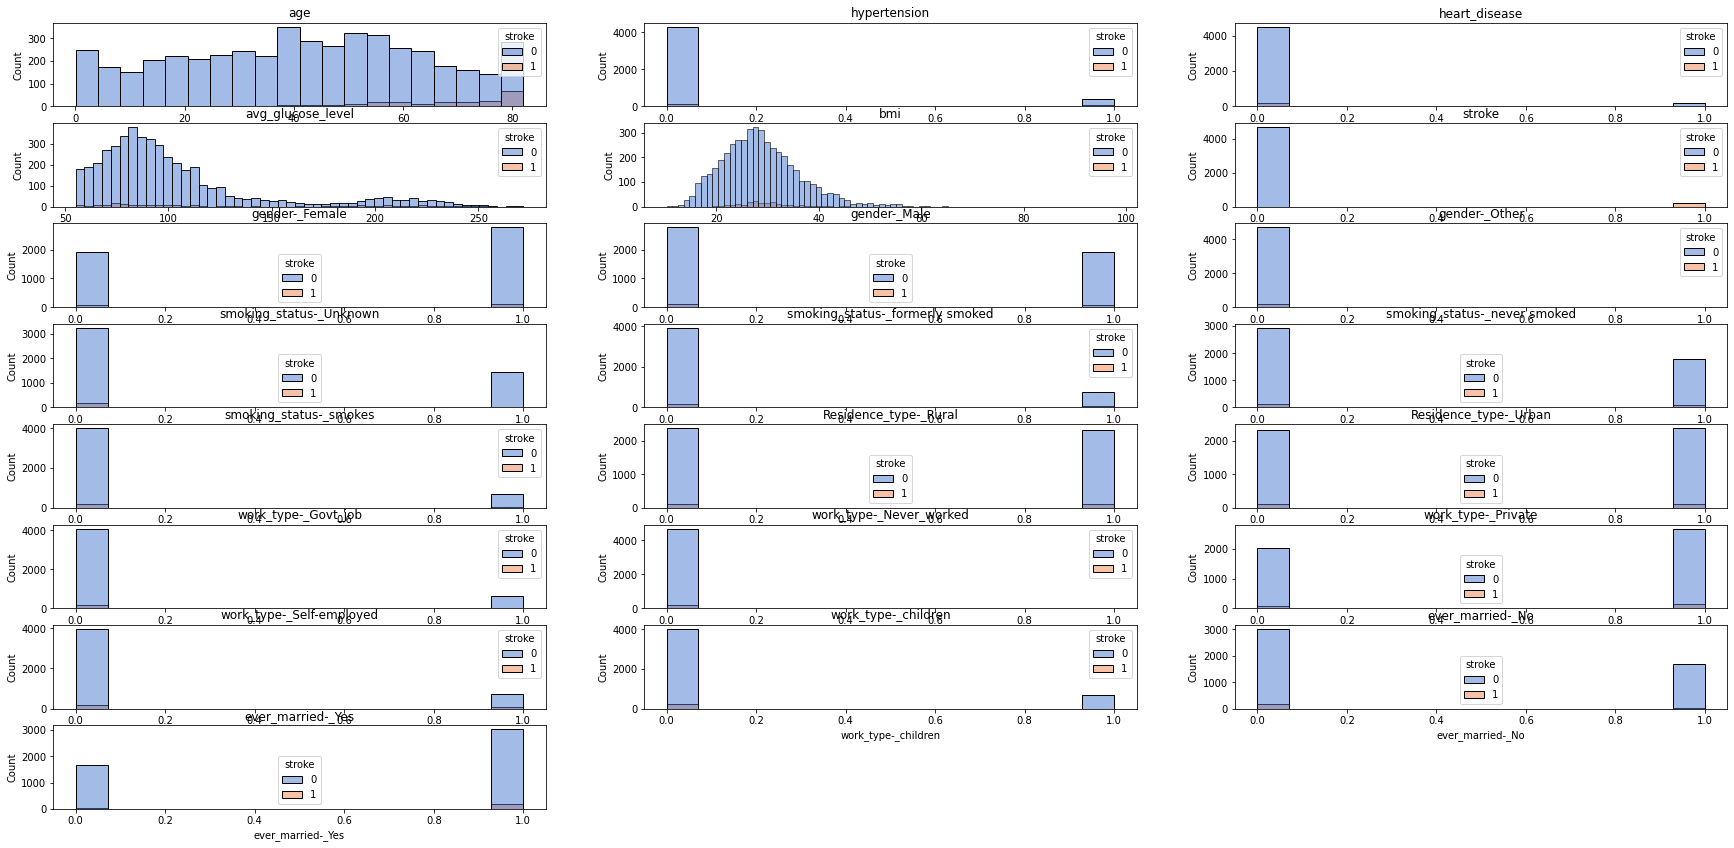

In [49]:
i = 0
his = plt.gcf()
his.set_size_inches(30, 20)
for feature in lista_features:
    i = i+1
    plt.subplot(11,3,i)
    sns.histplot(data = dados_pos_dummies,x = feature, hue="stroke", palette="muted").set_title(feature)

Normalização os dados

In [53]:
dados_normalizados = dados_pos_dummies.copy(deep = True)

for feature in lista_features:
    dados_normalizados[feature] = normalizaMinMax(dados_normalizados[feature])

dados_normalizados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,smoking_status-_smokes,Residence_type-_Rural,Residence_type-_Urban,work_type-_Govt_job,work_type-_Never_worked,work_type-_Private,work_type-_Self-employed,work_type-_children,ever_married-_No,ever_married-_Yes
0,9046,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.801265,0.301260,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,31112,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.234512,0.254296,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,60182,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.536008,0.276060,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.549349,0.156930,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,56669,Male,0.987793,0.0,0.0,Yes,Private,Urban,0.605161,0.214204,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Separar o conjunto de validação

In [52]:
validacao_df, modelo_df = split_validation_df(dados_normalizados,0.2)
validacao_df.head

<bound method NDFrame.head of          id  gender       age  hypertension  heart_disease ever_married  \
3246  22804  Female  0.304199           0.0            0.0           No   
345    9487  Female  0.279785           0.0            0.0           No   
292   44338  Female  0.194336           0.0            0.0           No   
3816  58422    Male  0.523926           0.0            0.0          Yes   
3384  46461  Female  0.633789           0.0            0.0          Yes   
...     ...     ...       ...           ...            ...          ...   
4032  46343  Female  0.963379           0.0            0.0          Yes   
5084  29540    Male  0.816895           0.0            0.0          Yes   
1291  43124  Female  0.609375           0.0            0.0          Yes   
1945   6844    Male  0.401855           0.0            0.0          Yes   
410   54975    Male  0.084473           0.0            0.0           No   

          work_type Residence_type  avg_glucose_level       bmi  ... 

Primeiro Modelo

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier(n_neighbors=1)

TOTAL_FOLDS = 8
fold_sets = k_fold(modelo_df, TOTAL_FOLDS)
score = 0


for fold_set in fold_sets:
    treino_df = fold_set["training_data"]
    teste_df = fold_set["test_data"]

    Xtreino = treino_df[lista_features]
    ytreino = treino_df["stroke"]
    knn_classifier.fit(Xtreino,ytreino)

    Xteste = teste_df[lista_features]
    yteste = teste_df["stroke"]
    y_result = knn_classifier.predict(Xteste)
    print(precision_score(y_result,yteste))
    score = score + precision_score(y_result,yteste)

print("Acc média: " + (str(score/TOTAL_FOLDS)))

0.07142857142857142
0.09523809523809523
0.1875
0.0967741935483871
0.16666666666666666
0.13043478260869565
0.16666666666666666
0.2608695652173913
Acc média: 0.14694731767180924


Segundo modelo

In [69]:
from sklearn.tree import DecisionTreeClassifier

dts = DecisionTreeClassifier()

TOTAL_FOLDS = 8
fold_sets = k_fold(modelo_df, TOTAL_FOLDS)
score = 0
accuracy = 0

for fold_set in fold_sets:
    treino_df = fold_set["training_data"]
    teste_df = fold_set["test_data"]

    Xtreino = treino_df[lista_features]
    ytreino = treino_df["stroke"]
    dts.fit(Xtreino,ytreino)

    Xteste = teste_df[lista_features]
    yteste = teste_df["stroke"]
    y_result = dts.predict(Xteste)
    print(precision_score(y_result,yteste))
    accuracy = accuracy + accuracy_score(y_result,yteste)
    score = score + precision_score(y_result,yteste)

print("Acc média: " + str(accuracy/TOTAL_FOLDS))
print("Precision média: " + (str(score/TOTAL_FOLDS)))

0.0
0.18181818181818182
0.1
0.06896551724137931
0.14285714285714285
0.15789473684210525
0.06666666666666667
0.16
Acc média: 0.9164969450101833
Precision média: 0.1097752806781845


In [81]:
def fix_undersampling(data, feature, under_value=1):
    n_samples = data[feature].where(data[feature] == under_value).count()
    while data[feature].where(data[feature] != under_value).count() > n_samples:
        item = data.sample()
        while (item[feature] == under_value):
            item = data.sample()
        data.drop(item.index, inplace=True)
    return data

fix_undersampling(dados_normalizados,"stroke",1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().